<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

[breast-histopathology-images](https://www.kaggle.com/paultimothymooney/breast-histopathology-images)

https://www.kaggle.com/debajyoti1/cnn-breast-idc

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from glob import glob
import random
from tensorflow import keras
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
mypaths=[]
for name in glob('Inputs/IDC_regular_ps50_idx5/*',recursive=True):
    mypaths.append(name)
print(mypaths[:5])


['Inputs/IDC_regular_ps50_idx5/9036', 'Inputs/IDC_regular_ps50_idx5/10268', 'Inputs/IDC_regular_ps50_idx5/10257', 'Inputs/IDC_regular_ps50_idx5/8913', 'Inputs/IDC_regular_ps50_idx5/13613']


In [3]:
mp=mypaths[60:120]
imagePatches=[]
for i in mp:
    imagePatches+=glob(i+'/*/*.png', recursive=True)


In [4]:
print('total no. of images selected from total images is '+str(len(imagePatches)))


total no. of images selected from total images is 58080


In [5]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)


In [6]:
print('Among them, '+str(len(class0))+' is clss0 and '+str(len(class1))+' is class1')


Among them, 43385 is clss0 and 14695 is class1


In [7]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)


14695

In [8]:
from matplotlib.image import imread
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import skimage.io

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = skimage.io.imread(i)
            img_sized = resize(img, (50, 50))
            img_arrays.append([img_sized, label])
    return img_arrays


In [9]:
%%time 
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

CPU times: user 57.4 s, sys: 1.61 s, total: 59 s
Wall time: 21.2 s


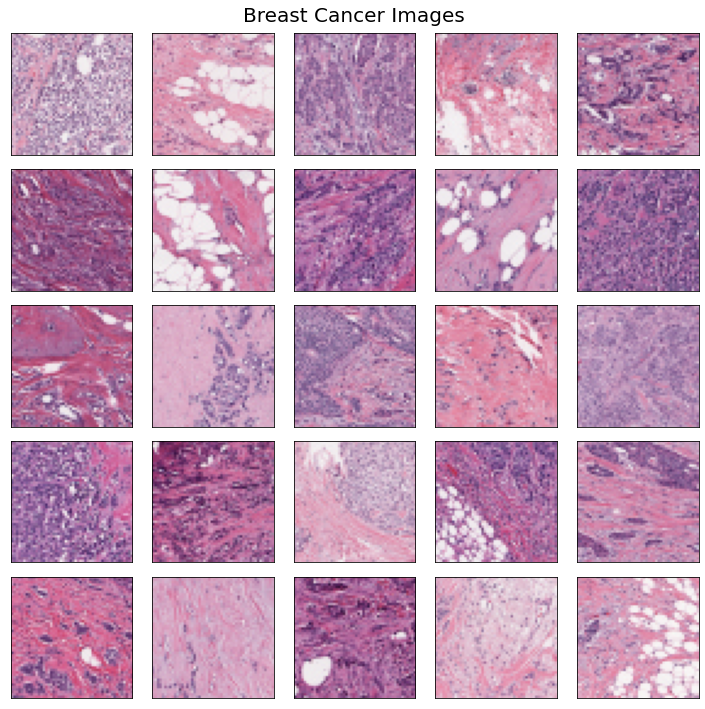

In [10]:

plt.figure(figsize=(10,10))
plt.suptitle("Breast Cancer Images", fontsize=20)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class1_array[i][0])
#    plt.imshow(train_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[train_labels[i]])

plt.tight_layout()
plt.savefig('Cancer-Images.png')  


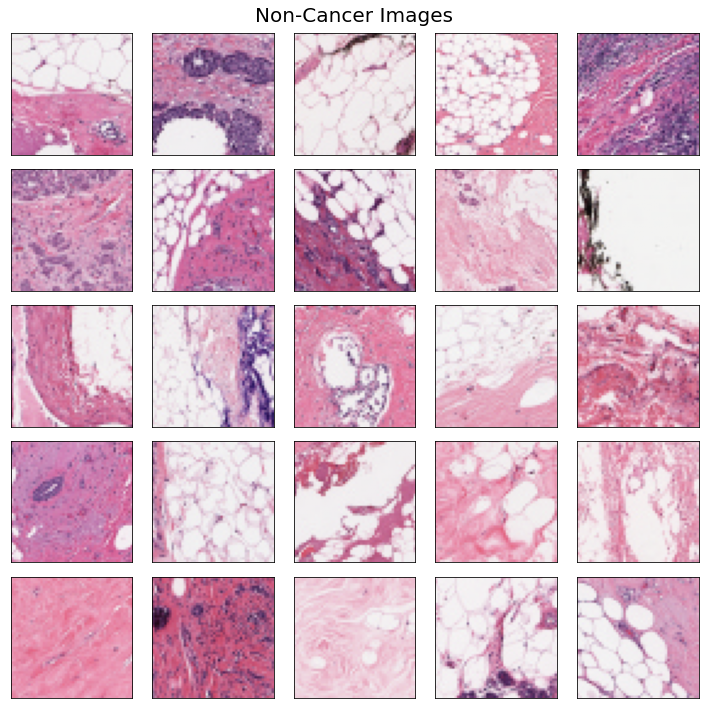

In [11]:
plt.figure(figsize=(10,10))
plt.suptitle("Non-Cancer Images", fontsize=20)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class0_array[i][0])
#    plt.imshow(train_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.savefig('non-Cancer-Images.png')  
plt.show()


In [12]:
combined_data = np.concatenate((class0_array, class1_array))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, 50, 50, 3)


In [15]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(22042, 50, 50, 3) (7348, 50, 50, 3) (22042, 2) (7348, 2)


In [52]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Dense,Flatten, BatchNormalization

def createModel():
    model = models.Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50,50,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

model = createModel()

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 64)       

In [54]:
model.compile(
    optimizer=tf.optimizers.Adam(lr=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/Users/gimoonnam/miniforge3/envs/tf25/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [55]:
%%time 
history=model.fit(X_train,y_train, 
                  validation_data=(X_test, y_test), 
                  batch_size=32,
                  epochs=20)


Epoch 1/20
  1/689 [..............................] - ETA: 4:07 - loss: 1.6344 - accuracy: 0.3750

2021-09-13 12:15:39.967977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


689/689 [==============================] - ETA: 0s - loss: 0.8429 - accuracy: 0.6892

2021-09-13 12:16:00.199672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


689/689 [==============================] - 23s 32ms/step - loss: 0.8429 - accuracy: 0.6892 - val_loss: 0.4962 - val_accuracy: 0.7730
Epoch 2/20
689/689 [==============================] - 22s 32ms/step - loss: 0.6357 - accuracy: 0.7663 - val_loss: 0.4326 - val_accuracy: 0.8202
Epoch 3/20
689/689 [==============================] - 22s 32ms/step - loss: 0.5510 - accuracy: 0.7904 - val_loss: 0.4232 - val_accuracy: 0.8239
Epoch 4/20
689/689 [==============================] - 22s 32ms/step - loss: 0.5131 - accuracy: 0.7997 - val_loss: 0.4152 - val_accuracy: 0.8270
Epoch 5/20
689/689 [==============================] - 22s 32ms/step - loss: 0.4821 - accuracy: 0.8061 - val_loss: 0.4151 - val_accuracy: 0.8307
Epoch 6/20
689/689 [==============================] - 22s 31ms/step - loss: 0.4626 - accuracy: 0.8110 - val_loss: 0.4082 - val_accuracy: 0.8329
Epoch 7/20
689/689 [==============================] - 22s 31ms/step - loss: 0.4519 - accuracy: 0.8143 - val_loss: 0.4460 - val_accuracy: 0.8208
Epo

In [56]:
e=model.evaluate(X_test,y_test)

230/230 [==============================] - 3s 11ms/step - loss: 0.4494 - accuracy: 0.8201


In [57]:
print(e)


[0.44936662912368774, 0.8200871348381042]


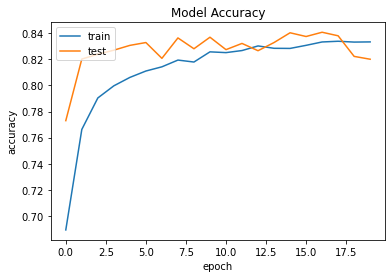

In [58]:
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

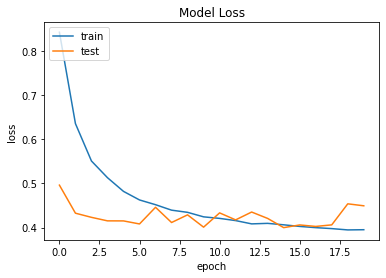

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
y_pred=model.predict(X_test)


2021-09-13 12:23:07.917009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [61]:
y_pred[21]


array([0.7856036 , 0.21439648], dtype=float32)

In [62]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [63]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Negative','Positive']))


Confusion Matrix
[[2662 1017]
 [ 305 3364]]
Classification Report
              precision    recall  f1-score   support

    Negative       0.90      0.72      0.80      3679
    Positive       0.77      0.92      0.84      3669

    accuracy                           0.82      7348
   macro avg       0.83      0.82      0.82      7348
weighted avg       0.83      0.82      0.82      7348



In [65]:
model.save('modelcnn.h5')


In [66]:
confusionmatrix=confusion_matrix(Y_test, Y_pred)
confusionmatrix.shape


(2, 2)

In [67]:
classes=[0,1]
con_mat_df = pd.DataFrame(confusion_matrix(Y_test, Y_pred),
                     index = classes, 
                     columns = classes)
con_mat_df

,0,1
0,2662,1017
1,305,3364


In [68]:
import seaborn as sns


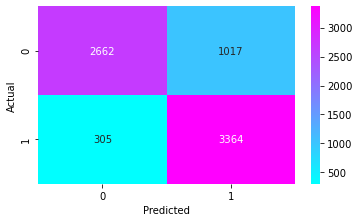

In [69]:
figure = plt.figure(figsize=(5, 3))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
